In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# NYC Data

In [2]:
# Read in NYC data

nyc_data = pd.read_csv('nyc_merged_data.csv', parse_dates = ['starttime', 'stoptime'])
del nyc_data["Unnamed: 0"]
nyc_data["Year Month"] = nyc_data['starttime'].dt.strftime('%Y%m')
nyc_data.head()

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,city,weather key,Pecipitation,max temp,min temp,avg wind,Year Month
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,504,1 Ave & E 15 St,16950,Customer,nyc,20130701,0.84,77,72,3.1,201307
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,459,W 20 St & 11 Ave,19816,Customer,nyc,20130701,0.84,77,72,3.1,201307
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,237,E 11 St & 2 Ave,14548,Subscriber,nyc,20130701,0.84,77,72,3.1,201307
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,499,Broadway & W 60 St,16063,Customer,nyc,20130701,0.84,77,72,3.1,201307
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,410,Suffolk St & Stanton St,19213,Subscriber,nyc,20130701,0.84,77,72,3.1,201307


In [10]:
# Columns for NYC data

list(nyc_data.columns.values)

['tripduration',
 'starttime',
 'stoptime',
 'start station id',
 'start station name',
 'end station id',
 'end station name',
 'bikeid',
 'usertype',
 'city',
 'weather key',
 'Pecipitation',
 'max temp',
 'min temp',
 'avg wind',
 'Year Month']

# SF Data

In [3]:
# Read in SF data

sf_data = pd.read_csv('sf_merged_data.csv', parse_dates = ['starttime', 'stoptime'])
del sf_data["Unnamed: 0"]
sf_data["Year Month"] = sf_data['starttime'].dt.strftime('%Y%m')
sf_data.head()

/Users/andrewlam/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tripduration,starttime,start station name,start station id,stoptime,end station name,end station id,bikeid,usertype,city,weather key,max temp,min temp,avg wind,Pecipitation,Year Month
0,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,San Francisco,2013082994107,74.0,61.0,11.0,0,201308
1,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,San Jose,2013082995113,81.0,63.0,7.0,0,201308
2,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,Mountain View,2013082994041,80.0,64.0,5.0,0,201308
3,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,San Jose,2013082995113,81.0,63.0,7.0,0,201308
4,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,San Francisco,2013082994107,74.0,61.0,11.0,0,201308


In [9]:
# Shape of SF data

sf_data.shape

(669959, 16)

In [11]:
# Columns for SF data

list(sf_data.columns.values)

['tripduration',
 'starttime',
 'start station name',
 'start station id',
 'stoptime',
 'end station name',
 'end station id',
 'bikeid',
 'usertype',
 'city',
 'weather key',
 'max temp',
 'min temp',
 'avg wind',
 'Pecipitation',
 'Year Month']

# Overall Ridership

What is the overall trend in ridership by city?

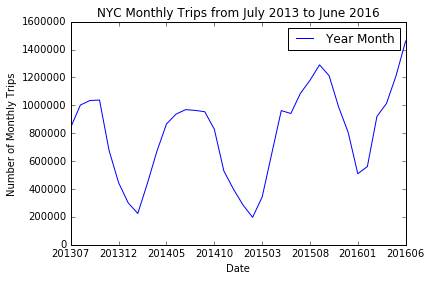

In [5]:
# NYC

nyc_data.groupby(['Year Month']).agg({'Year Month': np.count_nonzero}).plot()
plt.plot(legend=None)
plt.xlabel("Date")
plt.ylabel("Number of Monthly Trips")
plt.title("NYC Monthly Trips from July 2013 to June 2016")
plt.savefig('NYC Monthly Trips from July 2013 to June 2016.png')

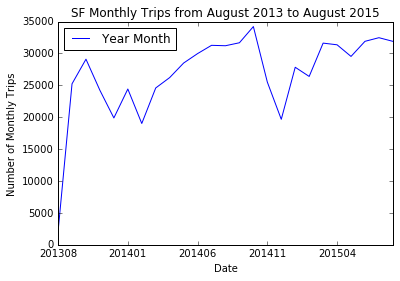

In [6]:
# SF

sf_data.groupby(['Year Month']).agg({'Year Month': np.count_nonzero}).plot()
plt.plot(legend=None)
plt.xlabel("Date")
plt.ylabel("Number of Monthly Trips")
plt.title("SF Monthly Trips from August 2013 to August 2015")
plt.savefig('SF Monthly Trips from August 2013 to August 2015.png')

Within each city, what is the average number of trips per station per month?

In [38]:
# NYC

nyc_trips_per_station_per_mo = nyc_data.groupby(['start station name', 'Year Month']).size()
nyc_trips_per_station_per_mo = pd.DataFrame(nyc_trips_per_station_per_mo).reset_index()
nyc_trips_per_station_per_mo.columns = ['start station name', 'Year Month', 'Trips']
nyc_trips_per_station_per_mo

# unique_nyc_start_stations = nyc_data['start station name'].unique()

# for start_station in unique_nyc_start_stations:
#     start_station_filter = nyc_trips_per_station_per_mo['start station name'] == start_station
#     print(nyc_trips_per_station_per_mo[start_station_filter].Trips.mean())

,start station name,Year Month,Trips
0,1 Ave & E 15 St,201307,4138
1,1 Ave & E 15 St,201308,4583
2,1 Ave & E 15 St,201309,4989
3,1 Ave & E 15 St,201310,5239
4,1 Ave & E 15 St,201311,3932
5,1 Ave & E 15 St,201312,2761
6,1 Ave & E 15 St,201401,1890
7,1 Ave & E 15 St,201402,1319
8,1 Ave & E 15 St,201403,2562
9,1 Ave & E 15 St,201404,4179


In [34]:
# Number of total months 
np.count_nonzero(nyc_data['Year Month'].unique())

36

In [36]:
nyc_data.groupby(['start station name']).size()

start station name
1 Ave & E 15 St                                   154640
1 Ave & E 18 St                                    85445
1 Ave & E 30 St                                   111145
1 Ave & E 44 St                                    67997
1 Ave & E 62 St                                    24601
1 Ave & E 68 St                                    43157
1 Ave & E 78 St                                    27070
10 Ave & W 28 St                                   96270
11 Ave & W 27 St                                  115181
11 Ave & W 41 St                                   95933
11 Ave & W 59 St                                   67928
12 Ave & W 40 St                                  139964
2 Ave & E 31 St                                   132949
2 Ave & E 58 St                                    60746
21 St & 41 Ave                                      1516
21 St & 43 Ave                                      1463
21 St & Queens Plaza North                           351
3 Ave & E 62

In [14]:
# Number of unique start stations 

unique_nyc_start_stations = nyc_data['start station name'].unique()
np.count_nonzero(unique_nyc_start_stations)

527

In [39]:
# SF

sf_trips_per_station_per_mo = sf_data.groupby(['start station name', 'Year Month']).size()
sf_trips_per_station_per_mo = pd.DataFrame(sf_trips_per_station_per_mo).reset_index()
sf_trips_per_station_per_mo.columns = ['start station name', 'Year Month', 'Trips']
sf_trips_per_station_per_mo

,start station name,Year Month,Trips
0,2nd at Folsom,201308,32
1,2nd at Folsom,201309,603
2,2nd at Folsom,201310,758
3,2nd at Folsom,201311,635
4,2nd at Folsom,201312,523
5,2nd at Folsom,201401,698
6,2nd at Folsom,201402,527
7,2nd at Folsom,201403,649
8,2nd at Folsom,201404,600
9,2nd at Folsom,201405,722


In [17]:
# Number of unique start stations 

unique_sf_start_stations = sf_data['start station name'].unique()
np.count_nonzero(unique_sf_start_stations)

74